# Case 1 - Basics
Welcome to the demonstration notebook where we'll go over all of the Basic functions in the **pylenm** package!<br>
Let’s get started!


## Installing, Importing, and Understanding the package

Make sure to install pylenm from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [1]:
# pip install pylenm

In [2]:
# Import our packages
import logging
import pylenm2
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm_df.__version__`

In [3]:
pylenm2.__version__

'2.7.1'

The pylenm_df package has one modules: 
   <br>     **PylenmDataModule:** where all of the package functionality is imported.

Let's import it!

In [4]:
from pylenm2 import PylenmDataModule

## Using pylenm

Now let's get our hands dirty and start exploring the **PylenmDataFactory** module.

First, import our two datasets here. It's located in the same directory in a folder called `data`.<br><br>
pylenm_df takes in two datasets: <br>
1. **Concentration Data:** Dataset containing the concetration values<br>
2. **Construction Data:** Dataset containing the construction information of locations such as the Longitude and Latitude values.

In [5]:
# %reload_ext pylenm2

# url_1 = 'https://raw.githubusercontent.com/ALTEMIS-DOE/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
# url_2 = 'https://github.com/ALTEMIS-DOE/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
# concentration_data = pd.read_csv(url_1)
# construction_data = pd.read_excel(url_2)


# url_1 = './data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
# url_2 = './data/FASB Well Construction Info.xlsx'

url_1 = "https://raw.githubusercontent.com/ALTEMIS-DOE/pylenm/refs/heads/satyarth/notebooks2/data/FASB_Data_thru_3Q2015_Reduced_Demo_general.csv"
url_2 = "https://github.com/ALTEMIS-DOE/pylenm/raw/refs/heads/satyarth/notebooks2/data/FASB_Well_Construction_Info_general.xlsx?raw=true"

concentration_data = pd.read_csv(url_1, dtype={15: str, 22: str, 23: str})      # dtype param specifies the type of columns 15, 22, and 23
construction_data = pd.read_excel(url_2, engine='openpyxl')    # for .xlsx files

Now that we have our data imported let's save the data into our functions class.

We do this by initializing **PylenmDataModule** with our data. We'll call the instance pylenm2_dm

In [6]:
# import importlib
# importlib.reload(PylenmDataModule)

# Create instance
# pylenm2_df = PylenmDataFactory(concentration_data) # Save concentration data
# pylenm2_df.setConstructionData(construction_data) # Save construction data

pylenm2_dm = PylenmDataModule(
    data=concentration_data,
    construction_data=construction_data,
    logger_level=logging.INFO,
)

2024-11-04 18:44:58,652 [INFO] data_module.py: line 137: Successfully imported the data!
Successfully imported the data!

2024-11-04 18:44:58,660 [INFO] data_module.py: line 167: Successfully imported the construction data!
Successfully imported the construction data!



If the data passed doesn't meet the package requiremnts, you'll be presented with the following message.

To demonstrate the requirments we'll pass an arbitrary list instead of a dataframe.

In [7]:
PylenmDataModule([1,2,3,4,5])

2024-11-04 18:44:58,674 [ERROR] data_module.py: line 71: `data` must be a Pandas DataFrame!
2024-11-04 18:44:58,676 [WARNING] data_module.py: line 146: 
PYLENM DATA REQUIREMENTS:
The imported data needs to meet ALL of the following conditions to have a successful import:
    1) Data should be a pandas dataframe.
    2) Data must have these column names: ['COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', 'RESULT_UNITS']



We can view the concentration data we imported by running the `getData()` function.

In [8]:
pylenm2_dm.get_data().head()

ID FACILITY  FFA_INDEX_NO SRS_AREA  \
0  767202      SRS            19      GSA   
1  767203      SRS            19      GSA   
2  767204      SRS            19      GSA   
3  767205      SRS            19      GSA   
4  767206      SRS            19      GSA   

                                       OPERABLE_UNIT STATION_ID  \
0  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FOB 15D   
1  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB133D   
2  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB134D   
3  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB136D   
4  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB122D   

      STATION_TYPE  SEIR_ID                   STATION_USE  REVISION_ID  ...  \
0  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN  ...   
1  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN  ...   
2  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN  ...   
3  MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN  ...   
4  MONITORING WELL      NaN          F_PLUME;H_AUX;MW_AUX          NaN  ...   

  COUNTING_UNCERTAINTY  MATRIX_CODE VALIDATION_STATUS FIELD_QC_CODE  \
0                  NaN          NaN                UE           NaN   
1                  NaN          NaN                UE           NaN   
2                  NaN          NaN                UE           NaN   
3                  NaN          NaN                UE           NaN   
4                  NaN          NaN                UE           NaN   

  LAB_QC_CODE LAB_CODE ANALYTE_TYPE DILUTION_FACTOR SAMPLER_COMMENTS  \
0         NaN      NaN          NaN             NaN      PROG_NAME=W   
1         NaN      NaN          NaN             NaN      PROG_NAME=W   
2         NaN      NaN          NaN             NaN      PROG_NAME=W   
3         NaN      NaN          NaN             NaN      PROG_NAME=W   
4         NaN      NaN          NaN             NaN      PROG_NAME=W   

  COLLECTION_TIME  
0           00:00  
1           00:00  
2           00:00  
3           00:00  
4           00:00  

[5 rows x 38 columns]

The same can be done for the construction data by running the `get_Construction_Data()` function.

In [9]:
pylenm2_dm.get_construction_data().head()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

               STATION_TYPE            STATION USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   

                     STATION_USE   LATITUDE  LONGITUDE     EASTING  ...  \
STATION_ID                                                          ...   
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564  ...   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781  ...   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432  ...   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928  ...   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287  ...   

            SZ_BOT(FT MSL)  GROUND_ELEVATION  REFERENCE_ELEVATION_CODE  \
STATION_ID                                                               
FAI001A             231.30             250.1                         C   
FAI001B             240.60             250.2                         C   
FAI001C             242.68             250.2                         C   
FAI001D             246.75             250.1                         C   
FAI002A             165.88             185.1                         C   

            REFERENCE_ELEVATION TOTAL_DEPTH  CONSTR_OBJ_DIAMETER  \
STATION_ID                                                         
FAI001A                  252.63       19.10                  2.0   
FAI001B                  252.73        9.90                  2.0   
FAI001C                  252.74        7.82                  2.0   
FAI001D                  252.56        3.65                  2.0   
FAI002A                  187.58        3.65                  2.0   

            CONSTR_OBJ_MATERIAL  PUMP_TYPE COMPLETION_DATE DATE_SEALED  
STATION_ID                                                              
FAI001A                     PVC       NONE      2016-03-22         NaT  
FAI001B                     PVC       NONE      2016-03-22         NaT  
FAI001C                     PVC       NONE      2016-03-22         NaT  
FAI001D                     PVC       NONE      2016-03-22         NaT  
FAI002A                     PVC       NONE      2016-03-29         NaT  

[5 rows x 22 columns]

At any point we can also reset the current working dataset by running `setData()` for the concentration data and `setConstructionData()` for the construction data.

In [10]:
pylenm2_dm.set_data(concentration_data, verbose=True)
pylenm2_dm.set_construction_data(construction_data, verbose=True)

Successfully imported the data!

Successfully imported the construction data!



We'll set the `inplace` parameter to `True` to make it the default working dataset. 

In [11]:
from pylenm2.data import filters
filters.simplify_data(data=pylenm2_dm, inplace=True)

COLLECTION_DATE STATION_ID          ANALYTE_NAME  RESULT RESULT_UNITS  \
0          1990-01-01     FSB 77                    PH    3.30           pH   
1          1990-01-01    FSB105C        DEPTH_TO_WATER   80.49           ft   
2          1990-01-01    FSB107D  SPECIFIC CONDUCTANCE  289.00        uS/cm   
3          1990-01-01    FSB101A        DEPTH_TO_WATER  134.49           ft   
4          1990-01-01    FSB101A  SPECIFIC CONDUCTANCE  161.00        uS/cm   
...               ...        ...                   ...     ...          ...   
86206      2015-09-24    FBI 15D        DEPTH_TO_WATER   15.40           ft   
86207      2015-09-24    FSB127D        DEPTH_TO_WATER   18.20           ft   
86208      2015-09-24    FSB113C        DEPTH_TO_WATER   23.20           ft   
86209      2015-09-24    FOB 13D        DEPTH_TO_WATER   21.50           ft   
86210      2015-09-24     FSB 79        DEPTH_TO_WATER   19.76           ft   

      COLLECTION_TIME  
0               00:00  
1               00:00  
2               00:00  
3               00:00  
4               00:00  
...               ...  
86206           00:00  
86207           00:00  
86208           00:00  
86209           00:00  
86210           00:00  

[86211 rows x 6 columns]

## Basic Functions

Let's generate some useful reports about the data by calling `get_analyte_details` and `get_data_summary`

In [12]:
from pylenm2.data import fetchers
fetchers.get_analyte_details(pylenm2_dm, analyte_name='DEPTH_TO_WATER')

Start Date    End Date  Date Range (days)  Unique samples
Station Name                                                           
FSB 94D       1990-01-01  1990-10-08                280               4
FSB 95D       1990-01-01  1990-10-08                280               4
FSB 77        1990-01-01  2006-10-16               6132             122
FSB111C       1990-01-01  2006-10-17               6133             115
FSB105C       1990-01-01  2006-10-19               6135             127
...                  ...         ...                ...             ...
FSB146D       2015-04-29  2015-09-09                133               9
FSB145D       2015-04-30  2015-09-09                132               9
FSB143D       2015-05-04  2015-09-09                128               9
FSB144D       2015-05-04  2015-09-09                128               9
FSB142D       2015-05-05  2015-09-09                127               9

[155 rows x 4 columns]

Most functions have a filtering feature which uses the `filter_by_column` fucntion to reduced the search space.<br>
We'll run `get_analyte_details` again but this time we'll view the results for the 'Lower Aquifer' wells only.

In [13]:
# pylenm_df.get_analyte_details('TRITIUM', filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

fetchers.get_analyte_details(data_pylenm_dm=pylenm2_dm, analyte_name='TRITIUM', filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

Start Date    End Date  Date Range (days)  Unique samples
Station Name                                                           
FSB 93C       1990-01-01  2015-07-28               9339             103
FSB107C       1990-01-01  2015-08-04               9346             103
FSB 94C       1990-01-02  2015-07-28               9338             109
FSB 97C       1990-01-03  2015-07-29               9338             103
FSB 98C       1990-01-03  2015-07-29               9338             102
FSB 87C       1990-01-06  2015-07-27               9333             103
FSB102C       1990-01-06  2015-07-28               9334             102
FSB 90C       1990-01-07  2015-07-28               9333             103
FSB 78C       1990-01-07  2015-08-03               9339             109
FSB 91C       1990-01-07  2015-08-03               9339              98
FSB 76C       1990-01-09  2015-07-27               9330             114
FSB 99C       1990-01-09  2015-07-29               9332             103
FSB104C       1990-01-09  2015-07-30               9333             103
FSB 79C       1990-01-09  2015-08-03               9337             102
FSB 88C       1990-01-16  2015-07-28               9324             103
FSB 89C       1990-01-16  2015-07-28               9324             103
FSB114C       1991-02-05  2015-07-27               8938              99
FSB122C       1991-02-06  2015-07-30               8940              97
FSB120C       1991-02-06  2015-08-04               8945              99
FSB112C       1991-02-06  2015-08-10               8951              97
FSB121C       1991-02-07  2015-02-04               8763              73
FSB123C       1991-02-10  2015-01-21               8746              73
FSB116C       1991-02-10  2015-01-22               8747              60
FSB115C       1991-02-11  2015-01-21               8745              60
FSB113C       1991-02-11  2015-07-27               8932              78
FSB 95CR      1991-02-24  2015-07-29               8921             105
FSB 92C       1993-11-07  2015-08-10               7946              87
FOB  2C       2004-05-05  2004-05-05                  0               1
FOB 14C       2004-05-05  2004-05-05                  0               1

`get_data_summary` is another useful summarization function.

In [14]:
fetchers.get_data_summary(data_pylenm_dm=pylenm2_dm, analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER'], sort_by='stations')

Start Date   End Date Date Range (days)  \
Analyte Name                                                   
TRITIUM              1990-01-01 2015-09-23         9396 days   
PH                   1990-01-01 2015-09-23         9396 days   
SPECIFIC CONDUCTANCE 1990-01-01 2015-09-23         9396 days   
DEPTH_TO_WATER       1990-01-01 2015-09-24         9397 days   
IODINE-129           1990-01-06 2015-09-23         9391 days   
URANIUM-238          1990-01-06 2015-09-23         9391 days   

                      # unique stations  # samples    Unit         mean  \
Analyte Name                                                              
TRITIUM                             160      13476  pCi/mL  1248.316406   
PH                                  158      18517      pH     5.354886   
SPECIFIC CONDUCTANCE                156      18276   uS/cm   425.754861   
DEPTH_TO_WATER                      155      20091      ft    46.814224   
IODINE-129                          150       5405   pCi/L    41.624339   
URANIUM-238                         144       5319   pCi/L    66.398114   

                              std      min     25%     50%     75%      max  
Analyte Name                                                                 
TRITIUM               3261.565925   -0.628  25.300  193.00  934.00  44800.0  
PH                       1.529332    0.000   4.100    5.20    6.40     12.7  
SPECIFIC CONDUCTANCE   555.068915    0.000  87.000  213.00  544.00  10700.0  
DEPTH_TO_WATER          38.137888    0.500  16.450   32.17   72.90    177.2  
IODINE-129              92.511351 -356.900   0.996    9.37   45.10   1620.0  
URANIUM-238            169.240747   -2.650   0.062    0.64   43.75   1810.0

Here is the same function but with the same filtering we applied above ('Lower Aquifer' wells).

In [15]:
fetchers.get_data_summary(
    data_pylenm_dm=pylenm2_dm, 
    analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER'], 
    filter=True, 
    col='AQUIFER', 
    equals=['LAZ_UTRAU'], 
    sort_by='stations',
)

Start Date   End Date Date Range (days)  \
Analyte Name                                                   
TRITIUM              1990-01-01 2015-08-10         9352 days   
SPECIFIC CONDUCTANCE 1990-01-01 2015-08-10         9352 days   
PH                   1990-01-01 2015-08-10         9352 days   
DEPTH_TO_WATER       1990-01-01 2015-09-24         9397 days   
IODINE-129           1990-01-06 2015-08-10         9347 days   
URANIUM-238          1990-01-06 2015-08-10         9347 days   

                      # unique stations  # samples    Unit         mean  \
Analyte Name                                                              
TRITIUM                              29       2961  pCi/mL  1904.185517   
SPECIFIC CONDUCTANCE                 29       4350   uS/cm   547.272770   
PH                                   29       4402      pH     5.208301   
DEPTH_TO_WATER                       29       4138      ft    54.328794   
IODINE-129                           27       1246   pCi/L    29.382026   
URANIUM-238                          27       1277   pCi/L    60.123929   

                              std     min      25%     50%       75%       max  
Analyte Name                                                                    
TRITIUM               3350.574654  -0.387  69.7000  638.00  1630.000  40000.00  
SPECIFIC CONDUCTANCE   668.286641   0.000  72.0000  300.00   660.000  10600.00  
PH                       1.135237   0.000   4.4000    5.30     5.830     12.60  
DEPTH_TO_WATER          25.240702   4.750  25.5150   67.45    75.680    120.13  
IODINE-129              40.177638 -16.150   2.0000   11.00    36.075    233.00  
URANIUM-238            130.590327  -0.408   0.0527    0.48    46.000   1030.00

In [16]:
filters.filter_by_column(
    construction_data, 
    col='AQUIFER', 
    equals=['LAZ_UTRAU']
).head()

FACILITY_ID SITE_GROUP                                          SITE_NAME  \
44          SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
47          SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
144         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
148         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
150         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

    STATION_ID     STATION_TYPE            STATION USE    AQUIFER STATION_USE  \
44     FBI 14C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU      ACTIVE   
47     FBI 16C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU      ACTIVE   
144    FOB  2C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU      ACTIVE   
148    FOB  5C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU      ACTIVE   
150    FOB  7C  MONITORING WELL  Auxiliary Observation  LAZ_UTRAU      ACTIVE   

      LATITUDE  LONGITUDE  ...  SZ_BOT(FT MSL)  GROUND_ELEVATION  \
44   33.271667 -81.677454  ...          148.78            222.80   
47   33.271394 -81.678173  ...          145.00            225.00   
144  33.270220 -81.680036  ...          146.56            226.58   
148  33.271922 -81.680770  ...          129.32            256.34   
150  33.275991 -81.682290  ...          148.87            295.85   

     REFERENCE_ELEVATION_CODE  REFERENCE_ELEVATION  TOTAL_DEPTH  \
44                          S               225.58        76.52   
47                          S               227.92        81.60   
144                         S               229.57        82.52   
148                         C               258.84       132.00   
150                         C               298.35       152.00   

    CONSTR_OBJ_DIAMETER  CONSTR_OBJ_MATERIAL            PUMP_TYPE  \
44                  2.0                  PVC  VARIABLE SPEED PUMP   
47                  2.0                  PVC  VARIABLE SPEED PUMP   
144                 2.0                  PVC  VARIABLE SPEED PUMP   
148                 2.0                  PVC                  NaN   
150                 2.0                  PVC                  NaN   

     COMPLETION_DATE DATE_SEALED  
44        2003-12-30         NaT  
47        2003-12-19         NaT  
144       2003-12-31         NaT  
148       1996-10-11         NaT  
150       1996-10-08         NaT  

[5 rows x 23 columns]

In [17]:
fetchers.get_station_analytes(
    data_pylenm_dm=pylenm2_dm, 
    station_names=['FSB102C', 'FSB118D'],
)

{'FSB102C': ['DEPTH_TO_WATER',
  'IODINE-129',
  'PH',
  'SPECIFIC CONDUCTANCE',
  'STRONTIUM-90',
  'TRITIUM',
  'URANIUM-238'],
 'FSB118D': ['DEPTH_TO_WATER',
  'IODINE-129',
  'PH',
  'SPECIFIC CONDUCTANCE',
  'STRONTIUM-90',
  'TRITIUM',
  'URANIUM-238']}

In [18]:
well_analytes = fetchers.get_station_analytes(
    data_pylenm_dm=pylenm2_dm, 
    filter=True, 
    col='AQUIFER', 
    equals=['LAZ_UTRAU'],
)

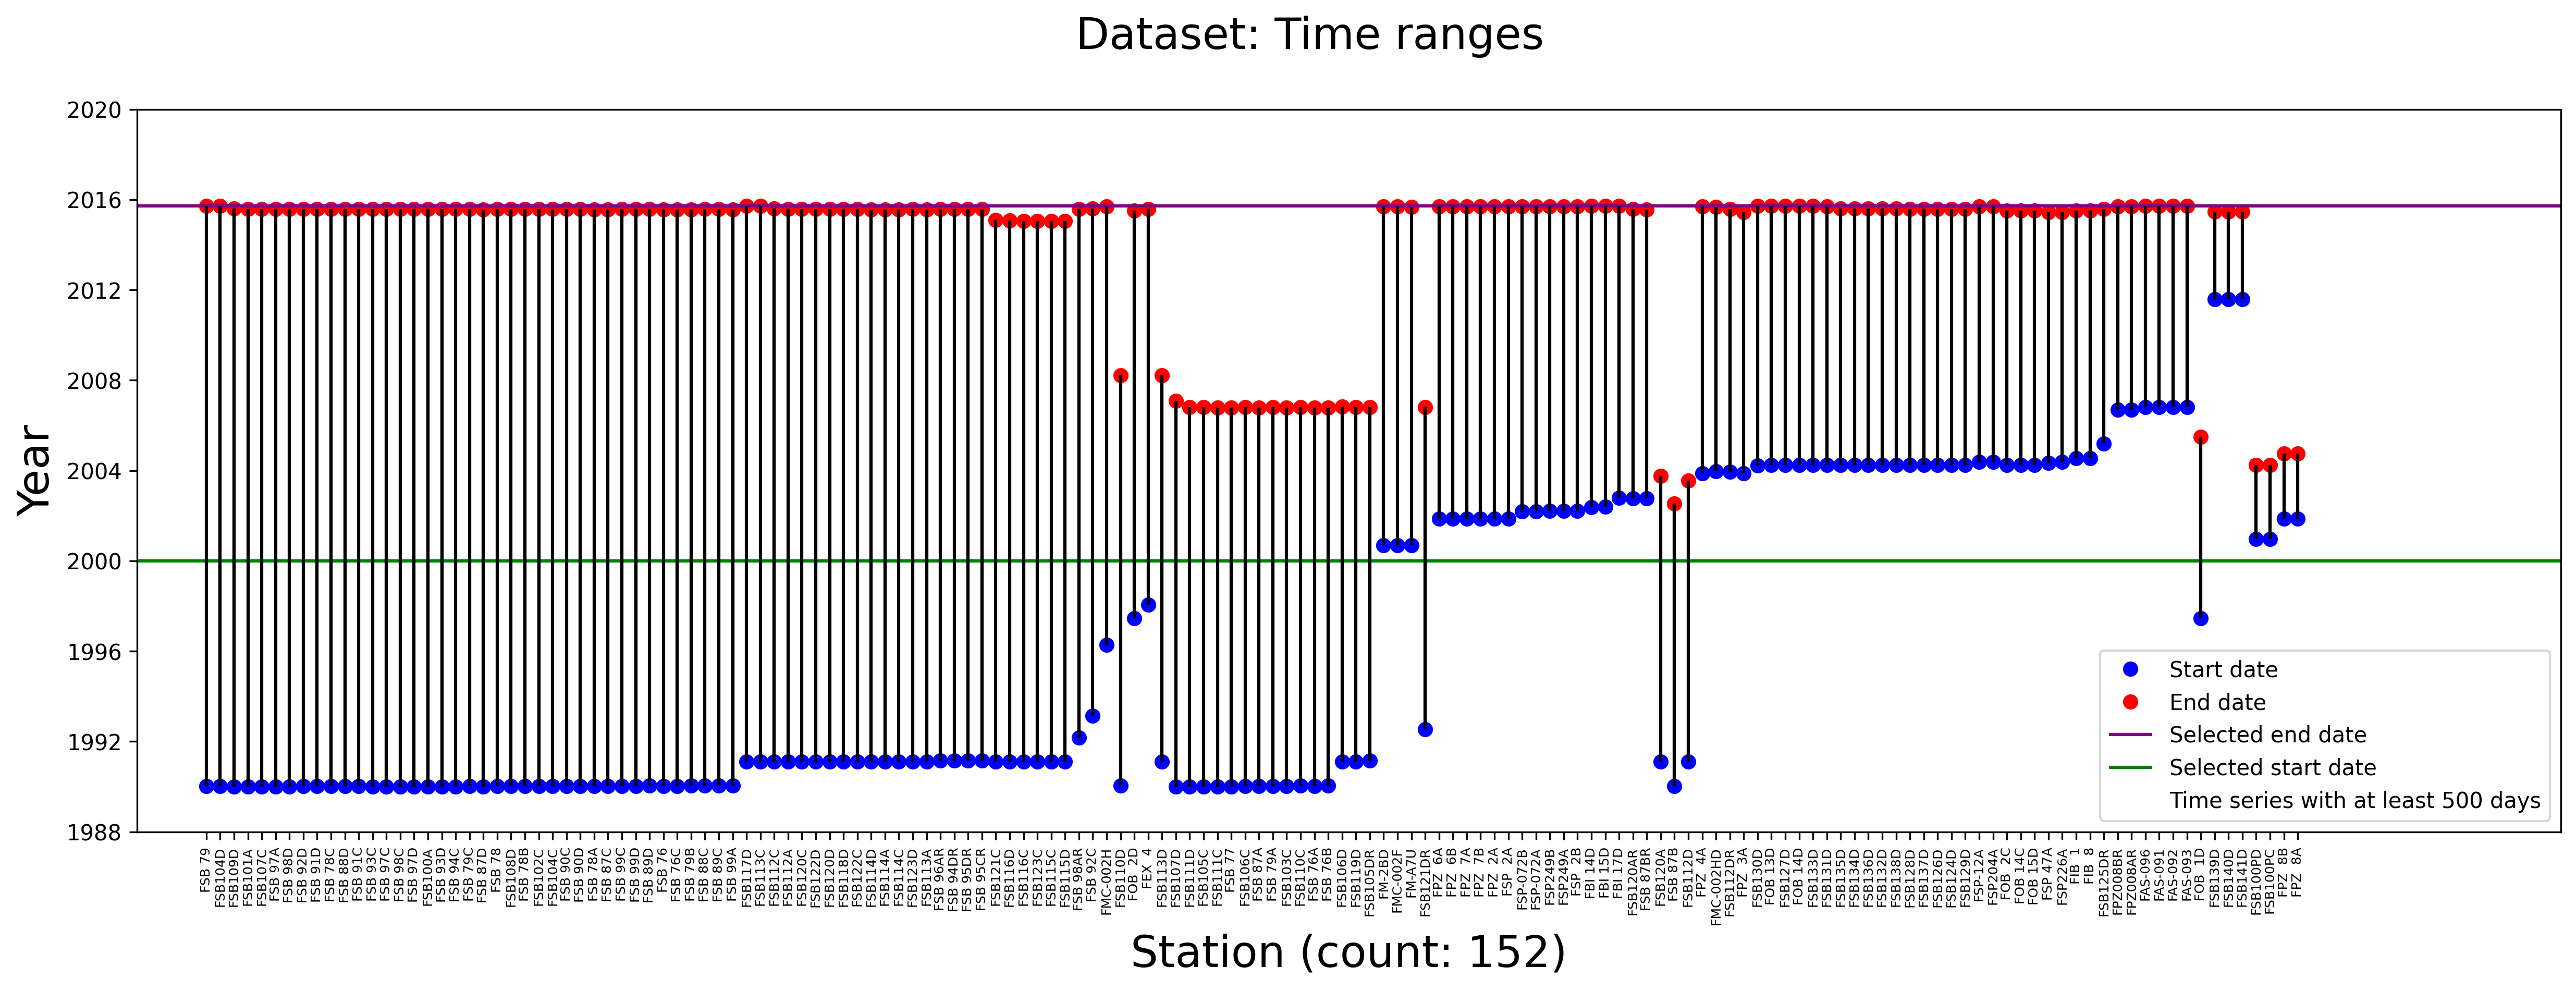

In [19]:
from pylenm2.visualization import timeseries

timeseries.plot_all_time_series_simple(
    data_pylenm_dm=pylenm2_dm, 
    start_date='2000-1-1', 
    min_days=500,
)

STATION_ID START_DATE   END_DATE     RANGE
0      FSB 92D 1990-01-06 2015-08-03 9340 days
1      FSB 91D 1990-01-06 2015-08-03 9340 days
2      FSB 78C 1990-01-07 2015-08-03 9339 days
3      FSB 79C 1990-01-09 2015-08-03 9337 days
4       FSB 79 1990-01-09 2015-08-03 9337 days
..         ...        ...        ...       ...
139    FSB139D 2012-06-05 2013-06-18  378 days
140    FSB140D 2012-06-05 2013-06-18  378 days
141    FSP  2C 2002-06-25 2002-09-17   84 days
142    FOB  1D 2004-04-23 2004-06-22   60 days
143    FOB 14D 2004-06-23 2004-08-19   57 days

[144 rows x 4 columns]

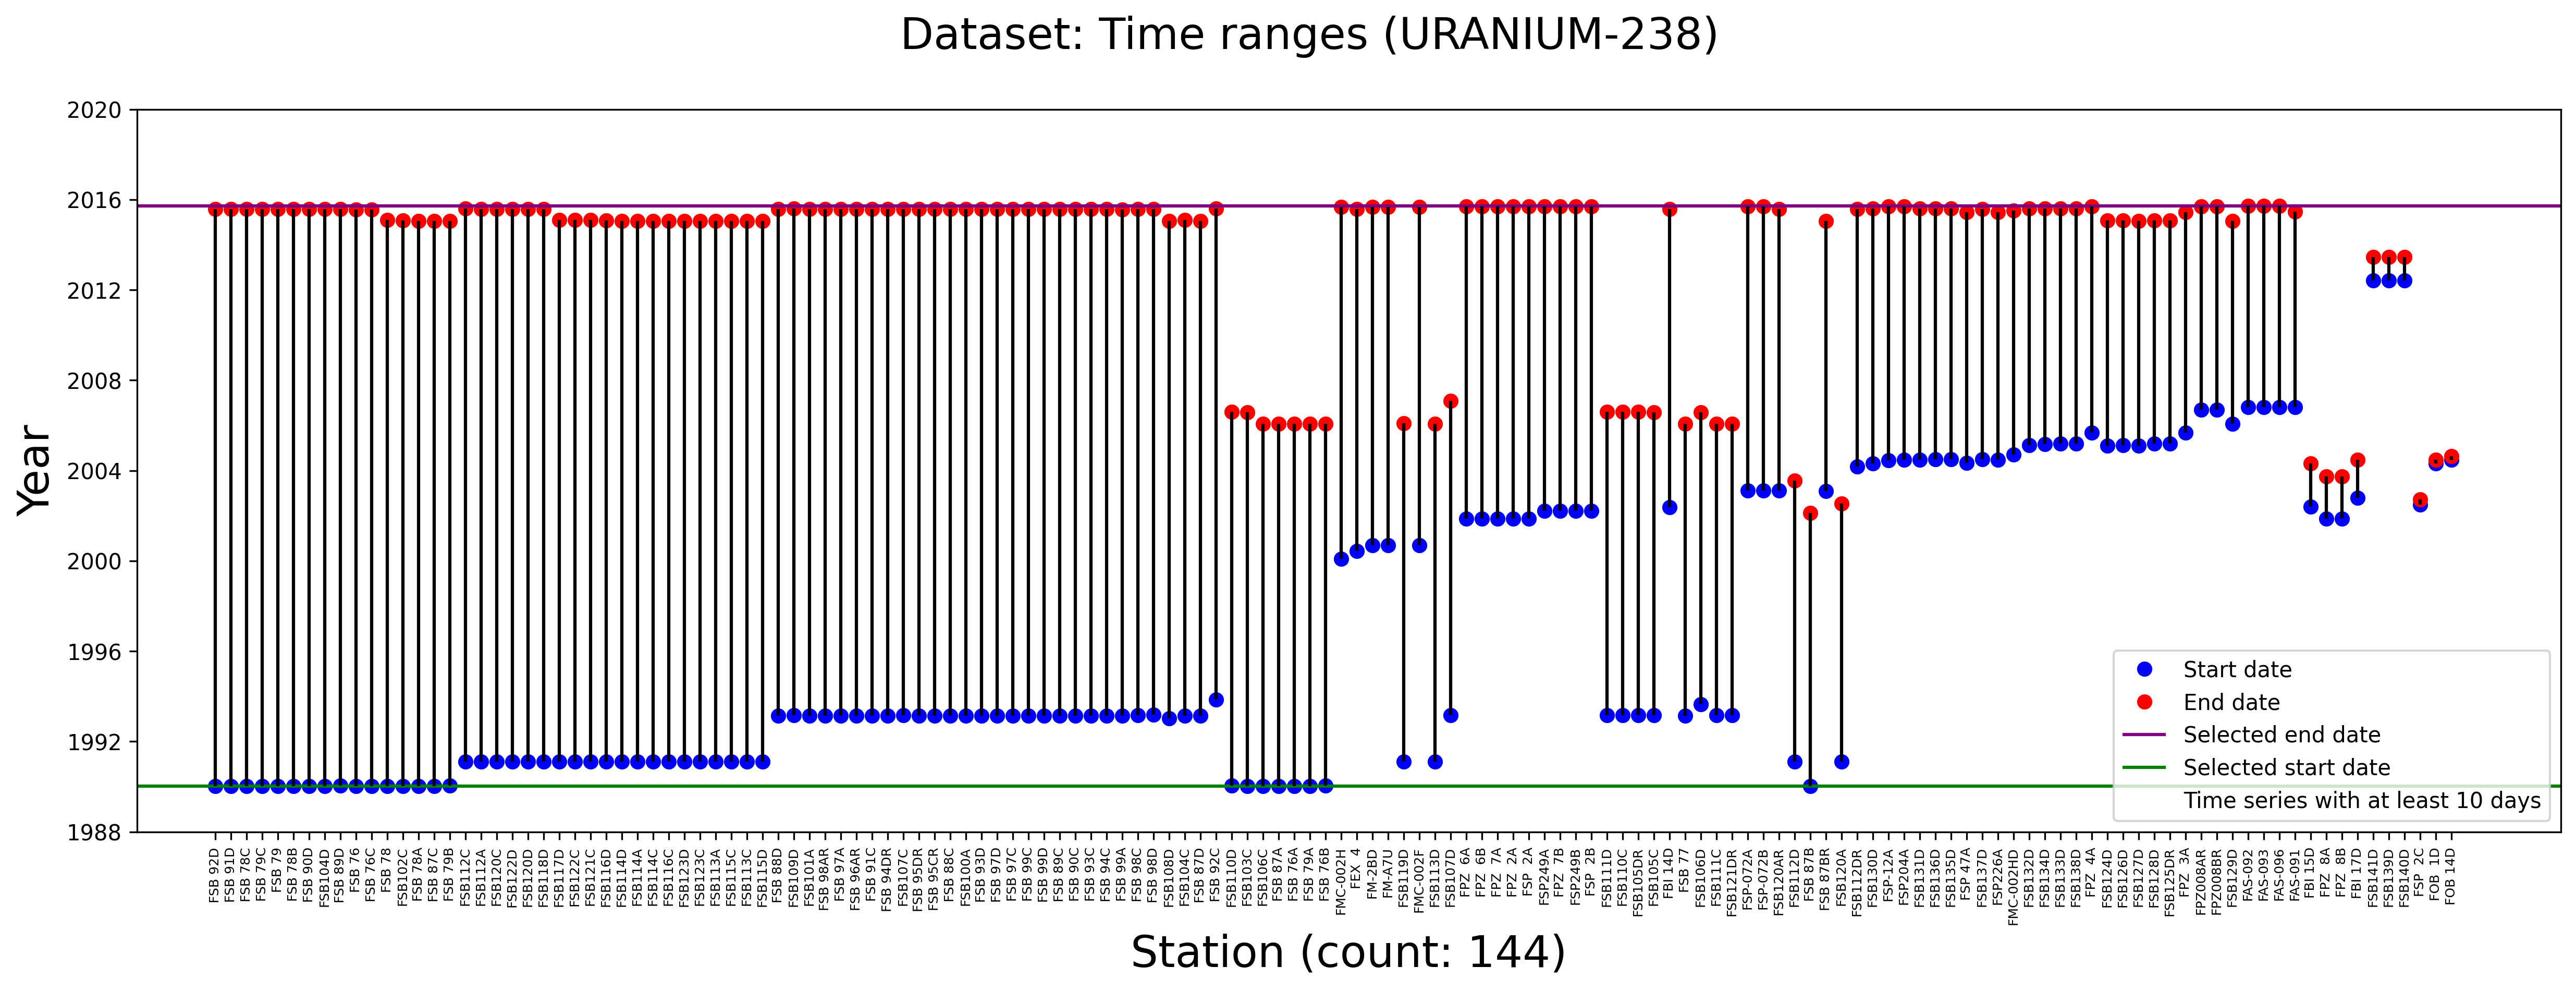

In [20]:
ur = timeseries.plot_all_time_series_simple(
    data_pylenm_dm=pylenm2_dm, 
    analyte_name='URANIUM-238', 
    x_max_lim=150, 
    return_data=True,
)
ur

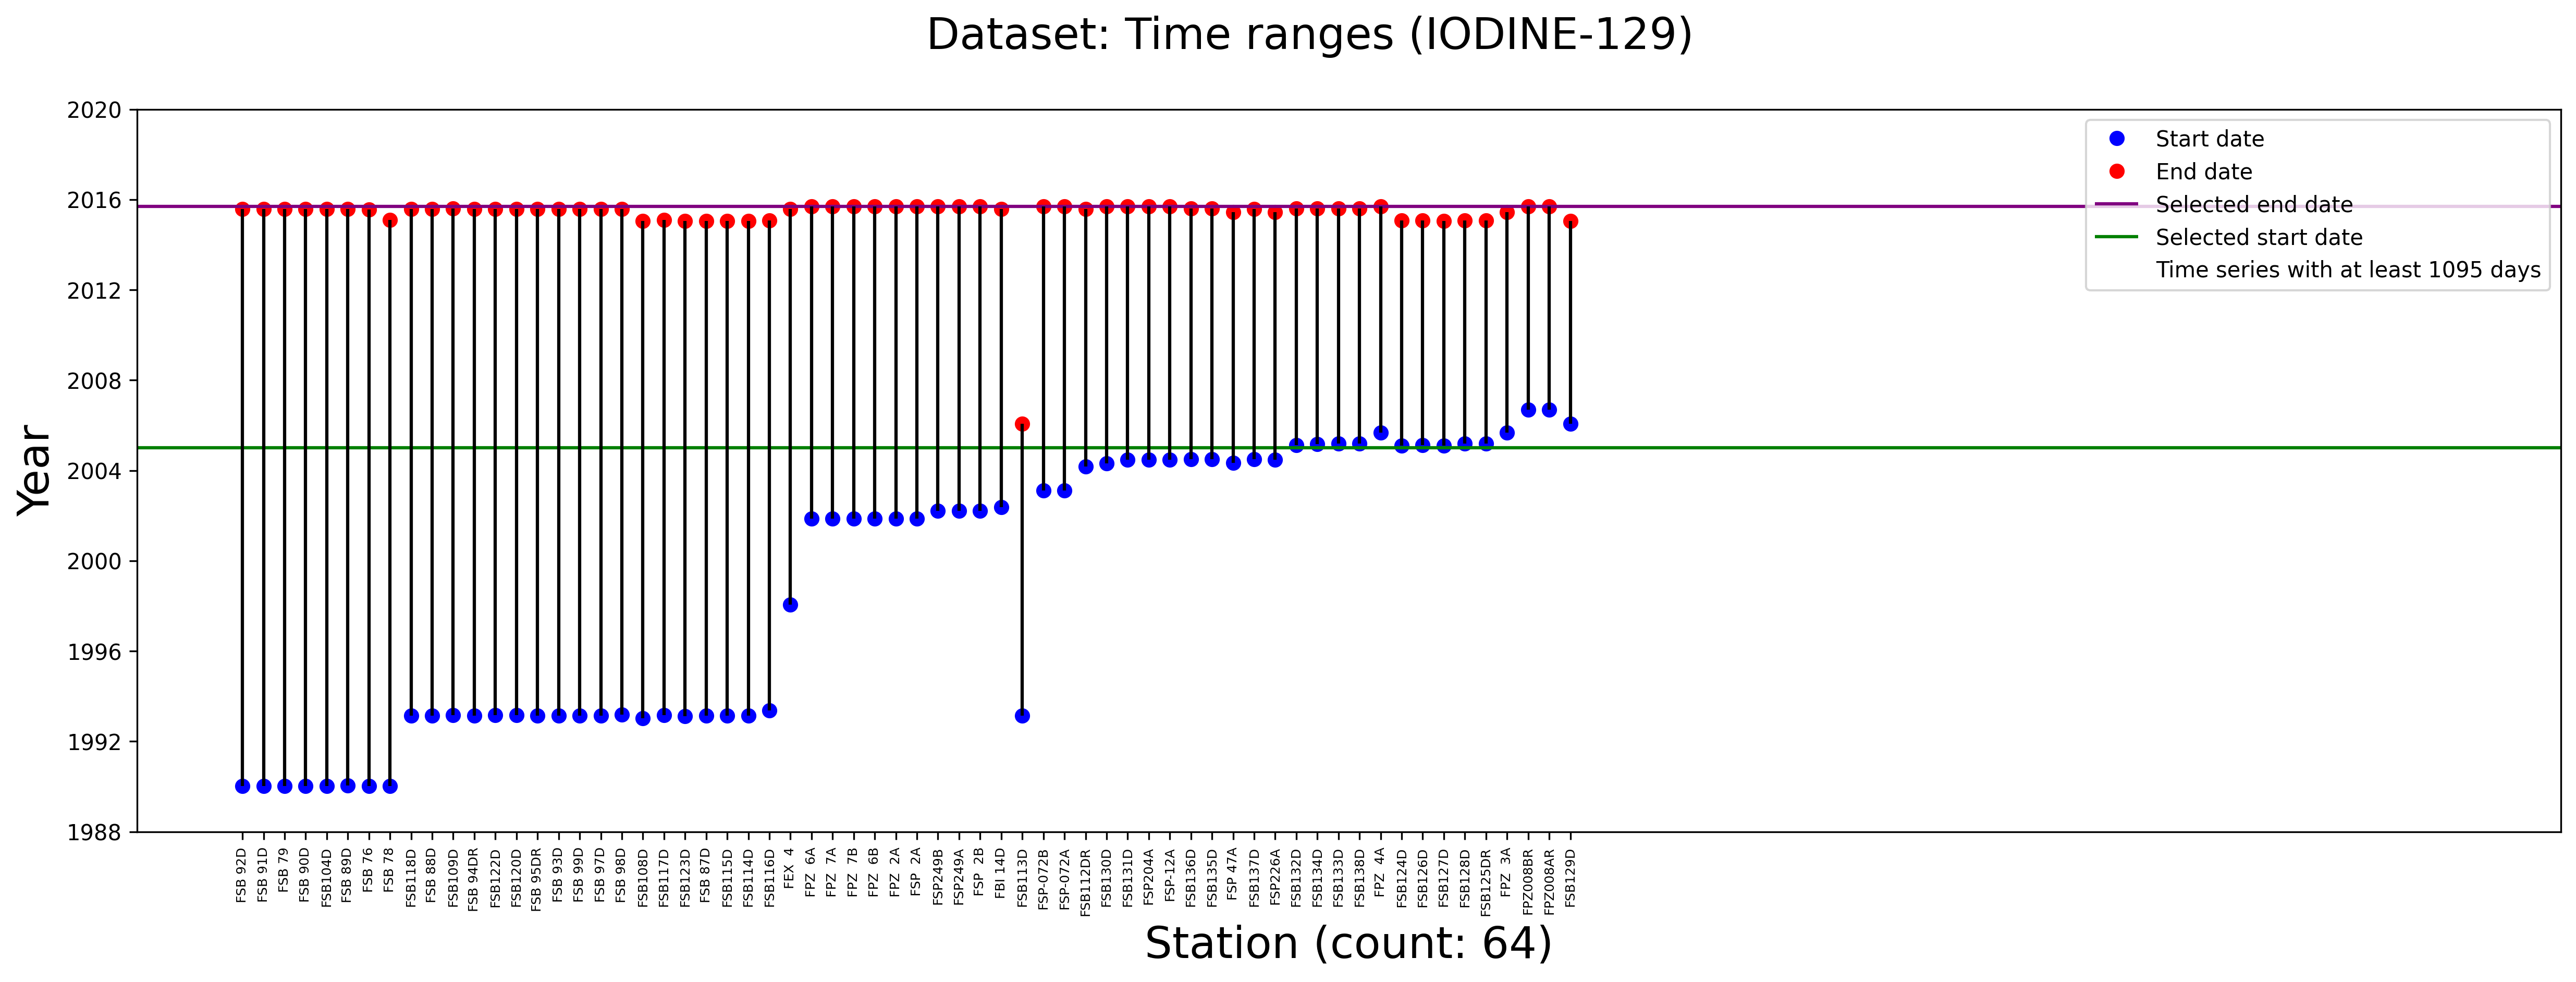

In [21]:
# Added filtering of 'Upper Aquifer' Wells
timeseries.plot_all_time_series_simple(
    data_pylenm_dm=pylenm2_dm, 
    analyte_name='IODINE-129', 
    min_days=3*365, 
    x_max_lim=110, 
    filter=True, 
    col='AQUIFER', 
    equals=['UAZ_UTRAU'], 
    start_date='2005-1-1',
)

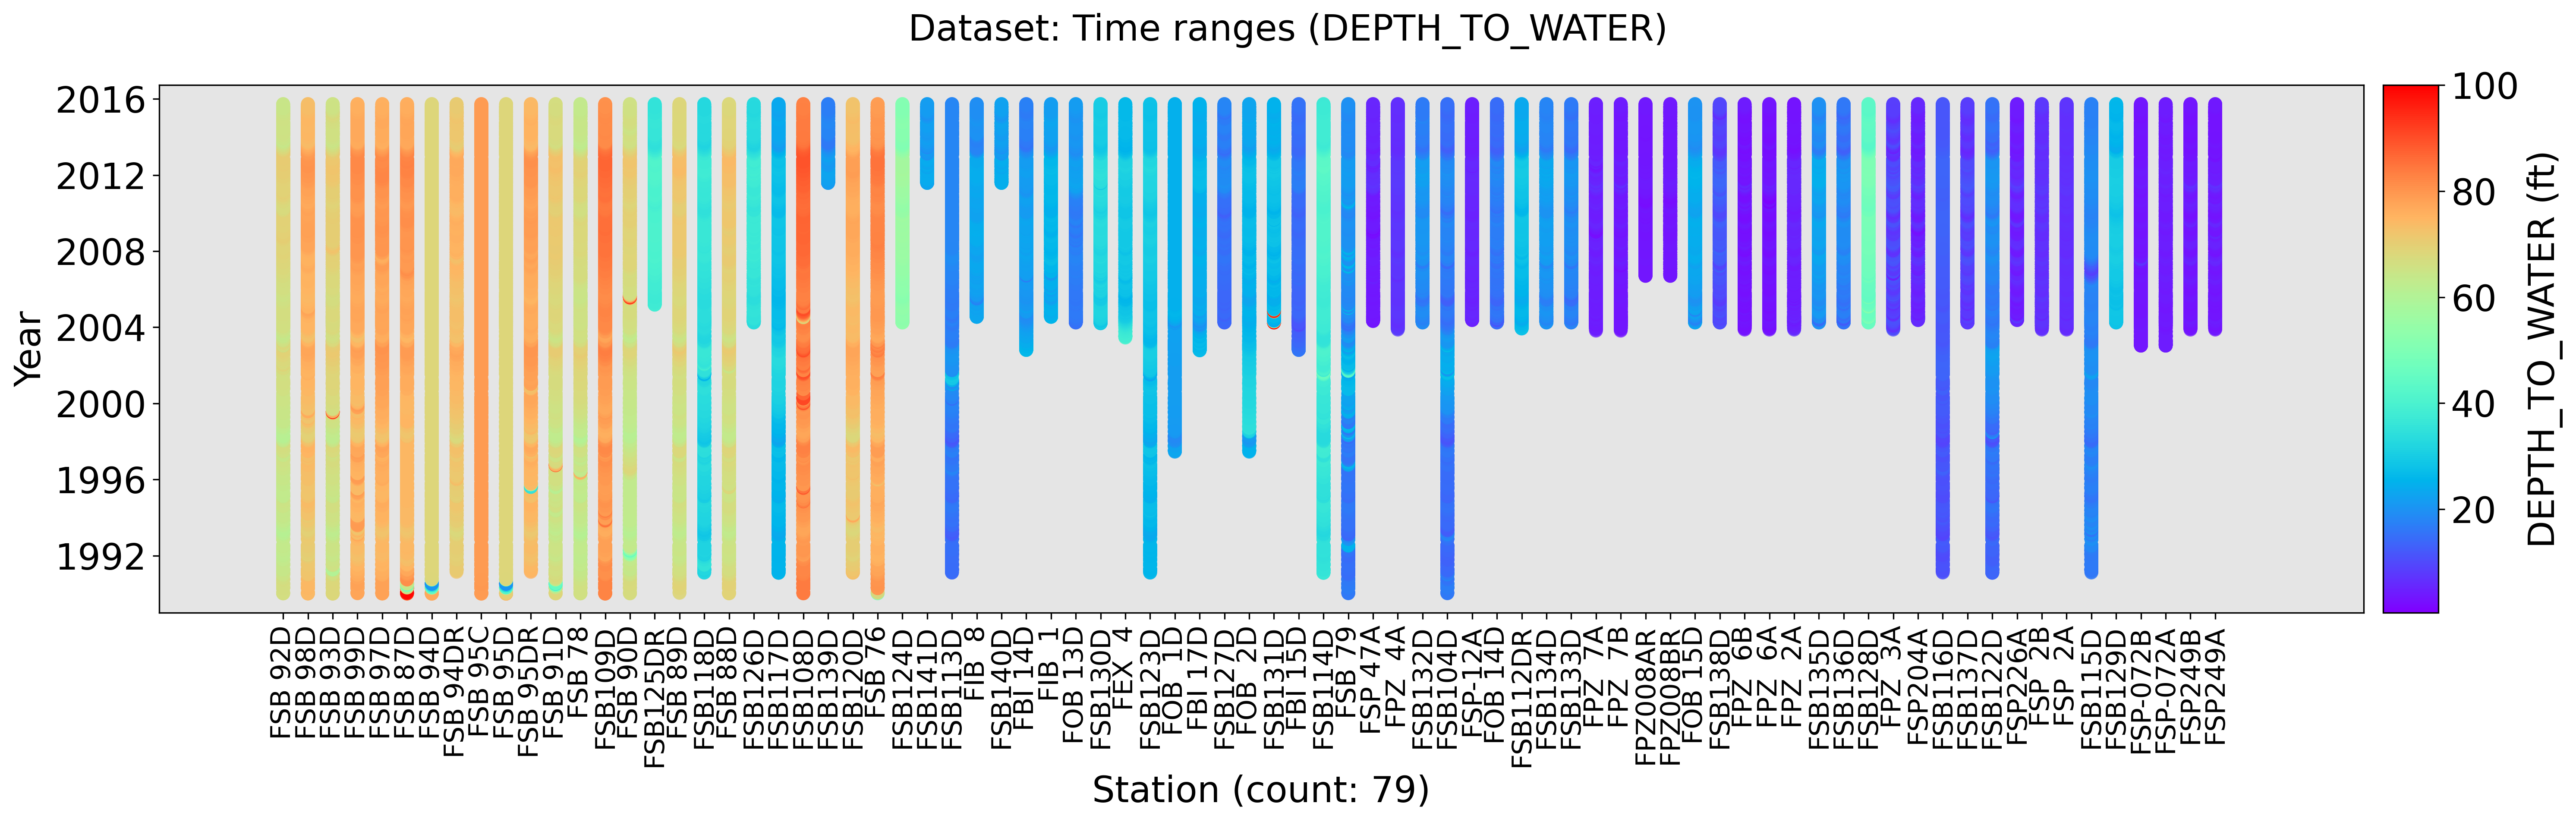

In [22]:
from pylenm2.stats import metrics
from pylenm2.visualization import timeseries

WT_UA = timeseries.plot_all_time_series(
    data_pylenm_dm=pylenm2_dm,
    analyte_name='DEPTH_TO_WATER', 
    filter=True, 
    col='AQUIFER', 
    equals=['UAZ_UTRAU'], 
    x_label_size=15, marker_size=60, return_data=True, cbar_max=100, 
    y_2nd_label='DEPTH_TO_WATER (ft)',
)

# fetchers.getCleanData(data_pylenm_dm=pylenm2_dm, analytes=["DEPTH_TO_WATER"])

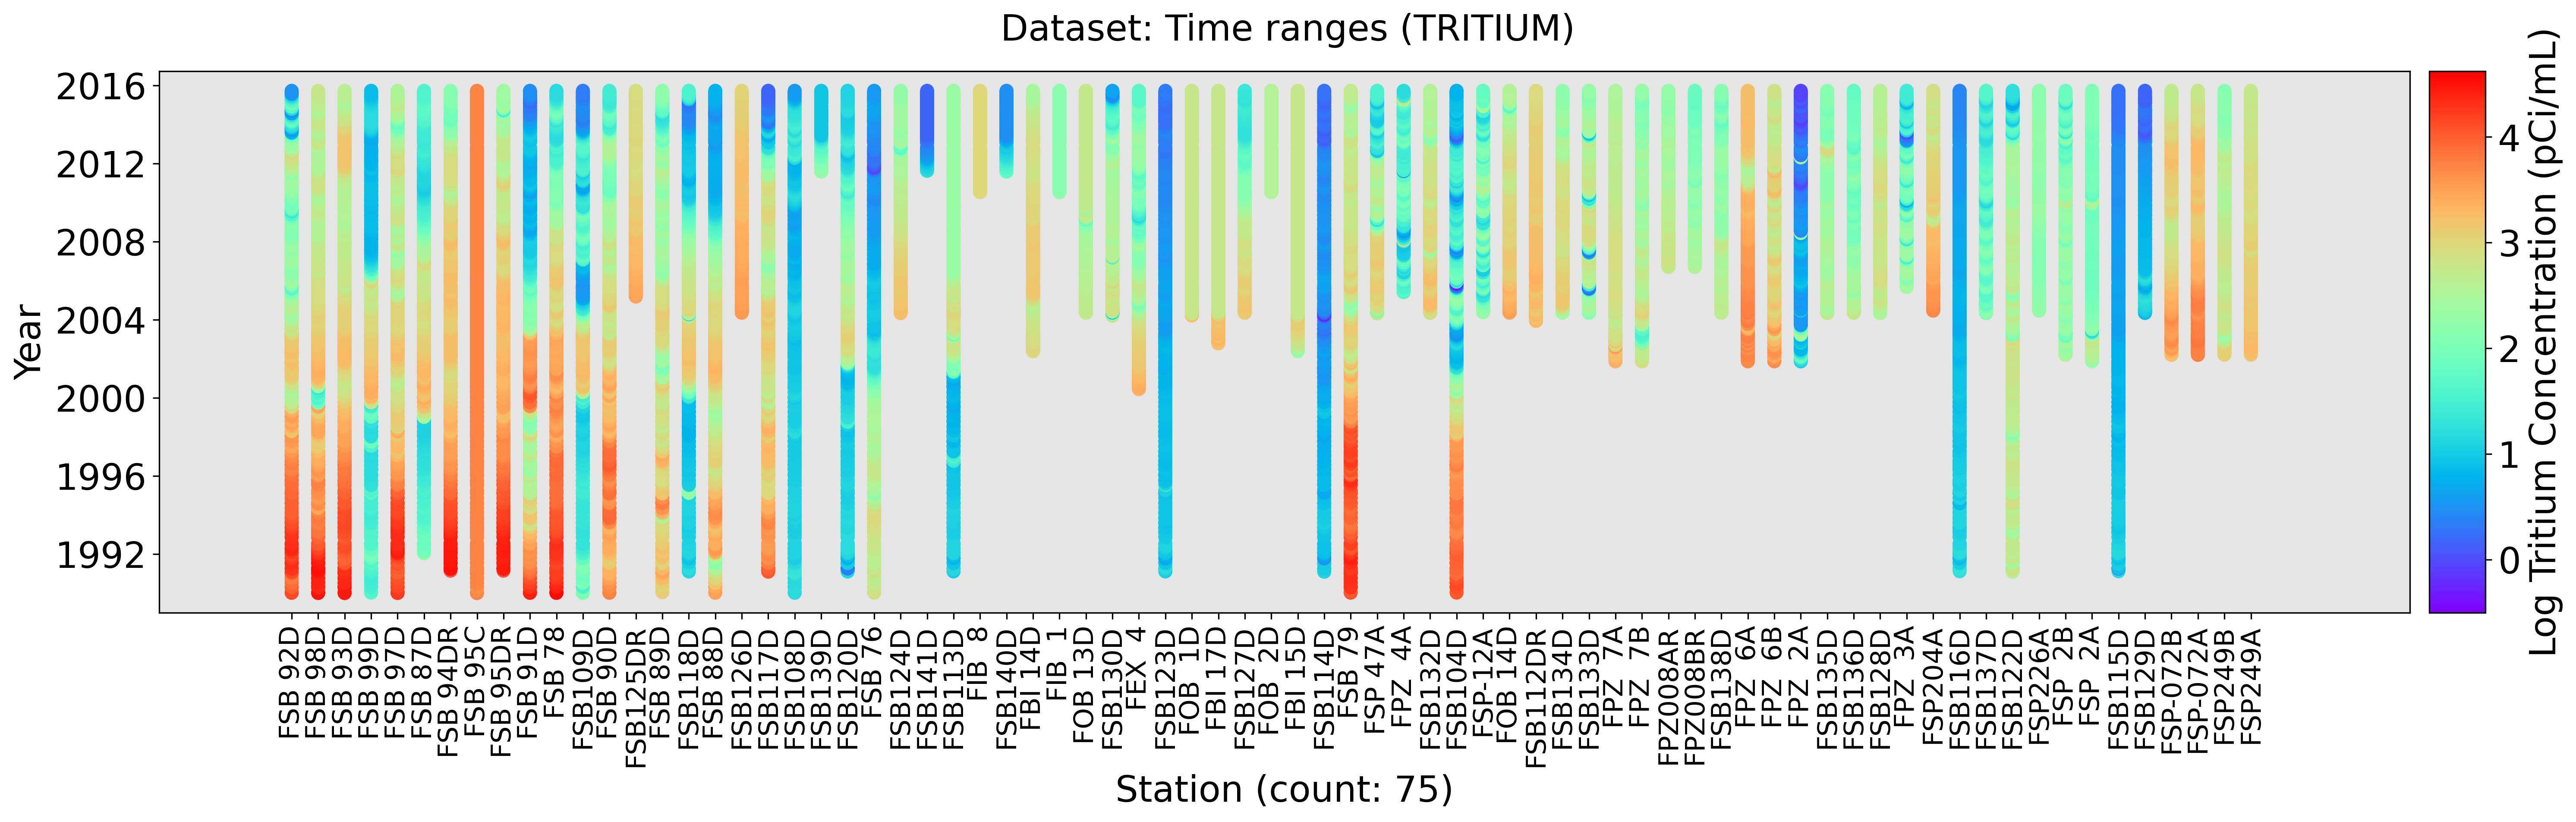

In [23]:
TR_UP = timeseries.plot_all_time_series(
    data_pylenm_dm=pylenm2_dm,
    analyte_name='TRITIUM', 
    filter=True, 
    col='AQUIFER', 
    equals=['UAZ_UTRAU'], 
    x_label_size=15, 
    marker_size=60, 
    log_transform=True, 
    return_data=True, 
    drop_cols=['FSB131D'],
    cbar_min=-0.5, 
    y_2nd_label='Log Tritium Concentration (pCi/mL)',
)

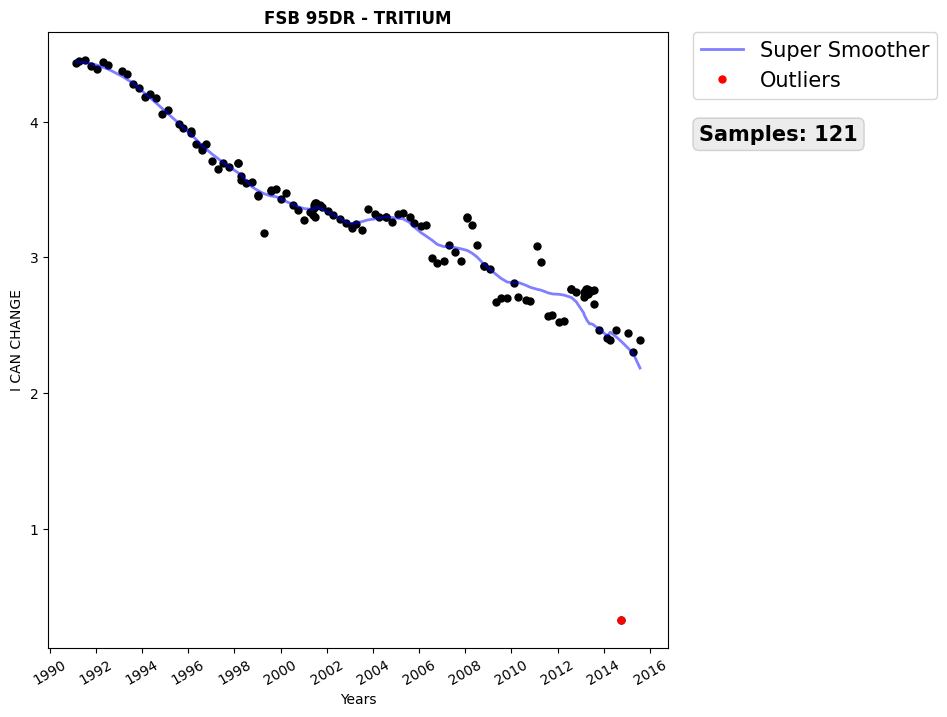

200

In [24]:
from pylenm2.visualization import plots

plots.plot_data(
    data_pylenm_dm=pylenm2_dm, 
    station_name='FSB 95DR', 
    analyte_name='TRITIUM', 
    y_label="I CAN CHANGE",
)

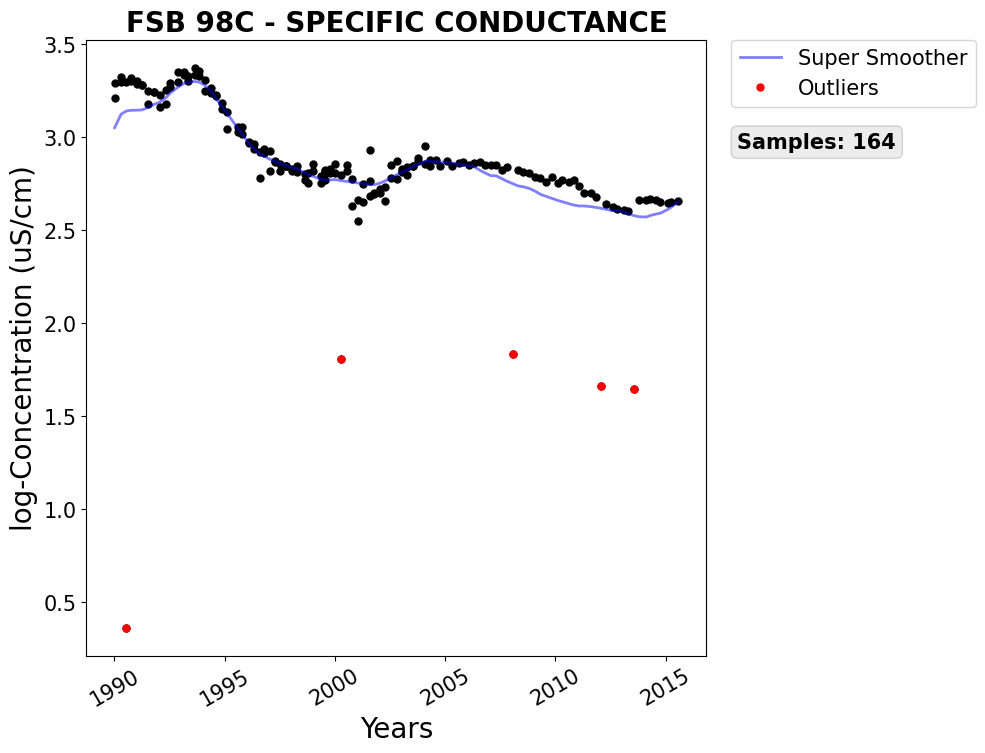

200

In [25]:
plots.plot_data(
    data_pylenm_dm=pylenm2_dm,
    station_name='FSB 98C', 
    analyte_name='SPECIFIC CONDUCTANCE', 
    year_interval=5,
)

When using the interpolation functionality, a resampling frequency can be specifed. Correct inputs for the the frequency can be found in the function description. 

The `interpolate_stations_by_analyte` function is great as it interpolates and combines all of the wells with the same analyte. There is no need to specify a start and end date as the algorithm will find the optimum start and end date.

In [26]:
from pylenm2.data import transformation
from pylenm2.stats import preprocess

wt = transformation.interpolate_stations_by_analyte(
    data_pylenm_dm=pylenm2_dm,
    analyte='DEPTH_TO_WATER',
    frequency= 'D',
    rm_outliers=True,
    z_threshold=2.5,
)
wt

FBI 14D    FSB115D    FSB113A    FSB113C    FSB113D  \
COLLECTION_DATE                                                          
1990-01-01       21.401161  18.012027  66.485932  22.547275  17.574662   
1990-01-02       21.401161  18.012027  66.485932  22.547275  17.574662   
1990-01-03       21.401161  18.012027  66.485932  22.547275  17.574662   
1990-01-04       21.401161  18.012027  66.485932  22.547275  17.574662   
1990-01-05       21.401161  18.012027  66.485932  22.547275  17.574662   
...                    ...        ...        ...        ...        ...   
2015-09-20       21.401161  18.012027  66.485932  22.547275  17.574662   
2015-09-21       17.288889  17.500000  67.000000  23.173846  18.200000   
2015-09-22       17.344444  17.500000  67.000000  23.186923  18.200000   
2015-09-23       21.401161  18.012027  66.485932  22.547275  17.574662   
2015-09-24       17.400000  17.500000  67.000000  23.200000  18.200000   

                   FSB114A   FSB114C    FSB114D    FSB115C    FSB116C  ...  \
COLLECTION_DATE                                                        ...   
1990-01-01       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
1990-01-02       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
1990-01-03       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
1990-01-04       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
1990-01-05       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
...                    ...       ...        ...        ...        ...  ...   
2015-09-20       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
2015-09-21       98.100000  41.60000  37.400000  23.900000  14.000000  ...   
2015-09-22       98.100000  41.60000  37.400000  23.900000  14.000000  ...   
2015-09-23       97.863396  41.87703  38.490928  23.800975  14.080381  ...   
2015-09-24       98.100000  41.60000  37.400000  23.900000  14.000000  ...   

                   FSB 90C    FSB 94C    FSB 90D    FSB 91C    FSB 91D  \
COLLECTION_DATE                                                          
1990-01-01       70.267273  75.647199  66.823471  71.245205  68.295295   
1990-01-02       70.267273  74.960000  66.823471  71.245205  68.295295   
1990-01-03       70.267273  74.997500  66.823471  71.245205  68.295295   
1990-01-04       70.267273  75.647199  66.823471  71.245205  68.295295   
1990-01-05       70.267273  75.647199  66.823471  71.245205  68.295295   
...                    ...        ...        ...        ...        ...   
2015-09-20       70.267273  75.647199  66.823471  71.245205  68.295295   
2015-09-21       69.600000  73.570000  65.440000  70.600000  66.680000   
2015-09-22       69.600000  73.570000  65.440000  70.600000  66.680000   
2015-09-23       70.267273  75.647199  66.823471  71.245205  68.295295   
2015-09-24       69.600000  73.570000  65.440000  70.600000  66.680000   

                  FSB 92C    FSB 92D    FSB 93C    FSB 93D   FSP249B  
COLLECTION_DATE                                                       
1990-01-01       69.02819  66.599289  69.880000  68.121585  3.611077  
1990-01-02       69.02819  66.599289  69.863529  68.280000  3.611077  
1990-01-03       69.02819  66.599289  69.847059  68.252941  3.611077  
1990-01-04       69.02819  66.599289  70.011212  68.121585  3.611077  
1990-01-05       69.02819  66.599289  70.011212  68.121585  3.611077  
...                   ...        ...        ...        ...       ...  
2015-09-20       69.02819  66.599289  70.011212  68.121585  3.611077  
2015-09-21       67.30000  64.400000  68.700000  65.320000  3.340000  
2015-09-22       67.30000  64.400000  68.700000  65.320000  3.340000  
2015-09-23       69.02819  66.599289  70.011212  68.121585  3.611077  
2015-09-24       67.30000  64.400000  68.700000  65.320000  3.340000  

[9398 rows x 155 columns]

Let's look at the difference between removing the outliers and keeping them.

<Axes: xlabel='COLLECTION_DATE'>

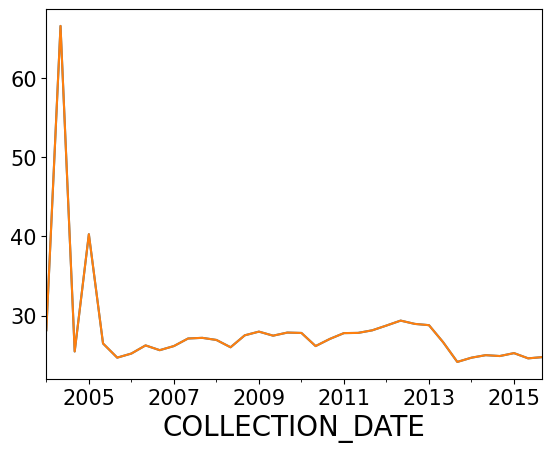

In [27]:
freq = '4M'
analyte = 'DEPTH_TO_WATER'

wt_with_outliers = transformation.interpolate_stations_by_analyte(
    data_pylenm_dm=pylenm2_dm,
    analyte=analyte,
    frequency=freq,
    rm_outliers=False,
)

wt_without_outliers = transformation.interpolate_stations_by_analyte(
    data_pylenm_dm=pylenm2_dm,
    analyte=analyte,
    frequency=freq,
    rm_outliers=True,
    z_threshold=1.5,
)


wt_with_outliers['FSB131D'].plot()
wt_without_outliers['FSB131D'].plot()

<Axes: xlabel='COLLECTION_DATE'>

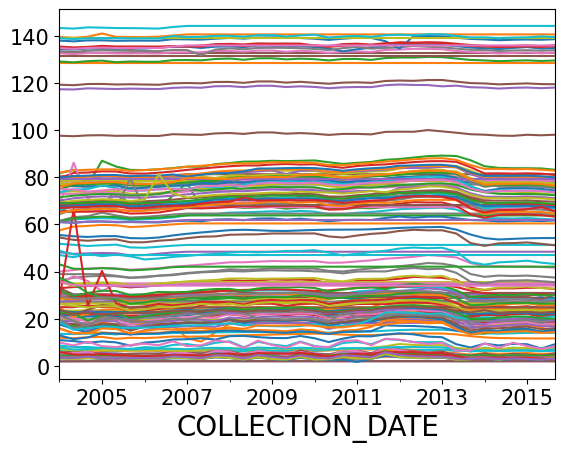

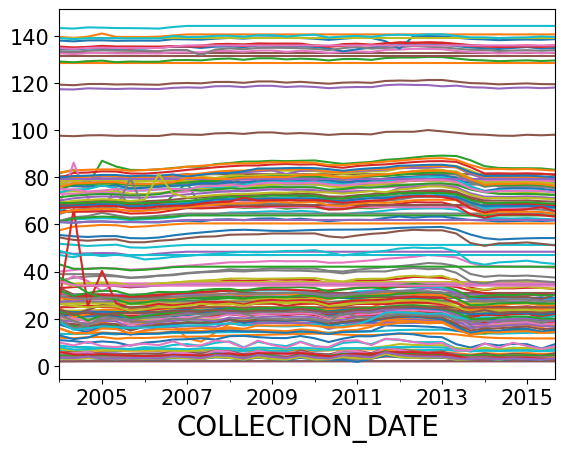

In [28]:
wt_with_outliers.plot(legend=None)
wt_without_outliers.plot(legend=None)

The `interpolate_well_data` function is useful if you are only looking at one well at a time. But has limited functionality as it can only take in **ONE** well as a parameter. 

In [29]:
transformation.interpolate_station_data(
    data_pylenm_dm=pylenm2_dm,
    station_name='FSB 95DR',
    analytes=['DEPTH_TO_WATER', 'URANIUM-238'],
    frequency='2M',
)

DEPTH_TO_WATER  URANIUM-238
COLLECTION_DATE                             
1993-02-28               73.030  1620.000000
1993-04-30               72.120  1475.000000
1993-06-30               71.325  1330.000000
1993-08-31               71.940  1100.000000
1993-10-31               72.540  1155.000000
...                         ...          ...
2014-12-31               75.375   239.666667
2015-02-28               75.610   232.000000
2015-04-30               75.000   224.333333
2015-06-30               74.615   216.666667
2015-08-31               74.230   209.000000

[136 rows x 2 columns]